<a href="https://colab.research.google.com/github/siphemkngwn/The-2024-Pediatric-Sepsis-Challenge/blob/main/model2_with_random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports

In [160]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import LabelEncoder, StandardScaler,OneHotEncoder
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from imblearn.combine import SMOTETomek
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score # Make sure this line is in your imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import LabelEncoder, StandardScaler,OneHotEncoder
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from imblearn.combine import SMOTETomek
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score # Make sure this line is in your imports
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
url='https://raw.githubusercontent.com/Kamaleswaran-Lab/The-2024-Pediatric-Sepsis-Challenge/refs/heads/main/SyntheticData_Training.csv'
df=pd.read_csv(url)


**Subsetting**

In [161]:
df=df.dropna(subset=['momagefirstpreg_adm'])

In [162]:
age_bins=[0,12,36,60,np.inf] # Use np.inf to represent infinity
age_labels=['infant','toddler','preschool','schoolgoing']
df['agecat']=pd.cut(df['agecalc_adm'],bins=age_bins,labels=age_labels)

#Selected variables from the list

In [163]:
sc=['height_cm_adm','muac_mm_adm','agecalc_adm','glucose_mmolpl_adm','lengthadm','rr_brpm_app_adm','weight_kg_adm','diasbp_mmhg_adm','sqi1_perc_oxi_adm','bcsverbal_adm','temp_c_adm','lactate_mmolpl_adm','hematocrit_gpdl_adm','bcsmotor_adm','sysbp_mmhg_adm','inhospital_mortality','agecat']

In [164]:
df=df[sc]

In [165]:
muac_bins=[0,115,125,np.inf]
muac_labels=['sam','mam','normal']
df['muac_cat']=pd.cut(df['muac_mm_adm'],bins=muac_bins,labels=muac_labels)

In [166]:
LabelEncoder()
le=LabelEncoder()

In [167]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_cols = [col for col in categorical_cols if col != 'inhospital_mortality'] # Exclude target variable

In [168]:
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [169]:
df['agecat']=le.fit_transform(df['agecat'])

In [170]:
df.head()

,height_cm_adm,muac_mm_adm,agecalc_adm,glucose_mmolpl_adm,lengthadm,rr_brpm_app_adm,weight_kg_adm,diasbp_mmhg_adm,sqi1_perc_oxi_adm,bcsverbal_adm,temp_c_adm,lactate_mmolpl_adm,hematocrit_gpdl_adm,bcsmotor_adm,sysbp_mmhg_adm,inhospital_mortality,agecat,muac_cat
0,79.8,150.0,16.8,4.8,2,23.0,11.6,54.0,98.0,0,36.3,2.2,38.0,0,92.0,0,3,1
1,93.0,151.0,46.1,7.2,5,35.0,13.6,42.0,99.0,0,36.8,2.7,42.0,0,72.0,0,1,1
2,68.2,148.0,7.9,5.0,4,56.0,8.2,51.0,98.0,0,37.2,2.9,40.0,0,94.0,0,0,1
3,95.0,138.0,38.2,11.7,5,38.0,12.0,57.0,99.0,0,37.6,NaN,NaN,0,94.0,0,1,1
4,83.0,165.0,16.1,5.8,7,61.0,12.0,73.0,96.0,0,38.7,4.4,42.0,0,107.0,0,3,1


In [171]:
numerical_features = df.select_dtypes(include=['number']).columns

In [172]:
from sklearn.impute import SimpleImputer

In [173]:
imputer = SimpleImputer(strategy='median')

In [174]:
df['agecat'] = le.fit_transform(df['agecat'])

df['bcsmotor_adm']=le.fit_transform(df['bcsmotor_adm'])
df['hematocrit_gpdl_adm']=le.fit_transform(df['hematocrit_gpdl_adm'])
df['bcsverbal_adm']=le.fit_transform(df['bcsverbal_adm'])

In [175]:
x=df.drop('inhospital_mortality',axis=1)
y=df['inhospital_mortality']

In [176]:
from sklearn.impute import SimpleImputer

# Create a SimpleImputer with strategy='mean'
imputer = SimpleImputer(strategy='mean')

# Fit the imputer to your data and transform it
x = imputer.fit_transform(x)

In [177]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=11)

In [178]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

#scaling

In [179]:
_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [180]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [181]:
rf_classifier.fit(x_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [182]:
y_pred=rf_classifier.predict(x_test)

In [183]:
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9979716024340771


In [184]:
sensitivity = recall_score(y_test, y_pred)
print(f"Sensitivity (Recall): {sensitivity}")

Sensitivity (Recall): 0.9523809523809523


In [185]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

specificity = tn / (tn + fp)

print(f"Specificity: {specificity}")

Specificity: 1.0


In [186]:
y_pred_proba = rf_classifier.predict_proba(x_test)[:, 1]  # Get probabilities for the positive class

# Now, calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

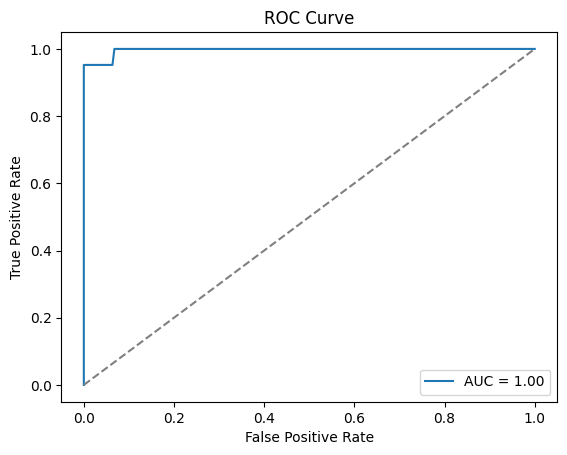

In [187]:
y_pred_proba = rf_classifier.predict_proba(x_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC (Area Under the Curve)
auc = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray') # Diagonal line for random classifier
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()